# VISUALIZAÇÃO DE AÇÕES

Teste feito em diversas empresas como Magazine Luiza, Azul e Gol para visualização geral das ações de 2015 - 2024


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from prophet import Prophet
from pandas_datareader import data
import yfinance as yf
import os




Download dos dados diretamente do Yahoo Finance



In [10]:
#Lista de ações
acoes = ['GOLL4.SA', 'AZUL4.SA', 'CVCB3.SA', 'WEGE3.SA', 'MGLU3.SA', 'TOTS3.SA', 'BOVA11.SA']

# Criar um DataFrame vazio para armazenar os dados
acoes_df = pd.DataFrame()


for acao in acoes:
    acoes_df[acao] = yf.download(acao, start='2015-01-01')['Close']



csv_file = 'database//acoes.csv'

if not os.path.exists(csv_file):
    acoes_df.to_csv(csv_file)
    print(f"Arquivo '{csv_file}' salvo com sucesso!")
else:
    
    print(f"O arquivo '{csv_file}' já existe. Nenhuma ação realizada.")



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

O arquivo 'database//acoes.csv' já existe. Nenhuma ação realizada.


Tratamento de valores faltantes

In [11]:
acoes_df.fillna(acoes_df.mean(), inplace=True) 


## Plot de todos os histogramas


<Axes: xlabel='GOLL4.SA', ylabel='Count'>

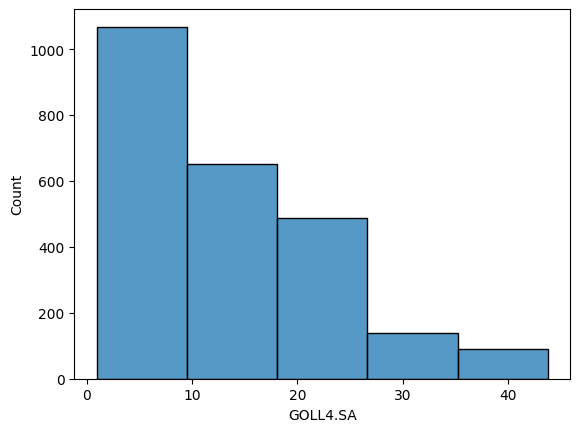

In [12]:
sns.histplot(acoes_df['GOLL4.SA'],bins=5)

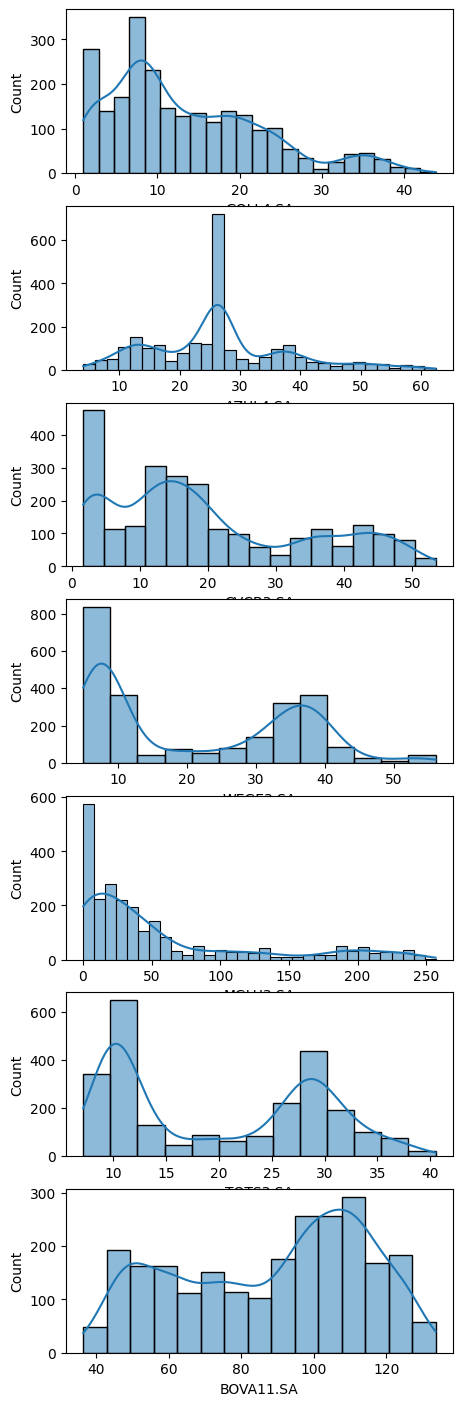

In [14]:
plt.figure(figsize=(5,20))
for i in np.arange(0,len(acoes_df.columns)):
    plt.subplot(8,1,i+1)
    sns.histplot(acoes_df[acoes_df.columns[i]],kde=True)

## Outliers de todas as empresas 

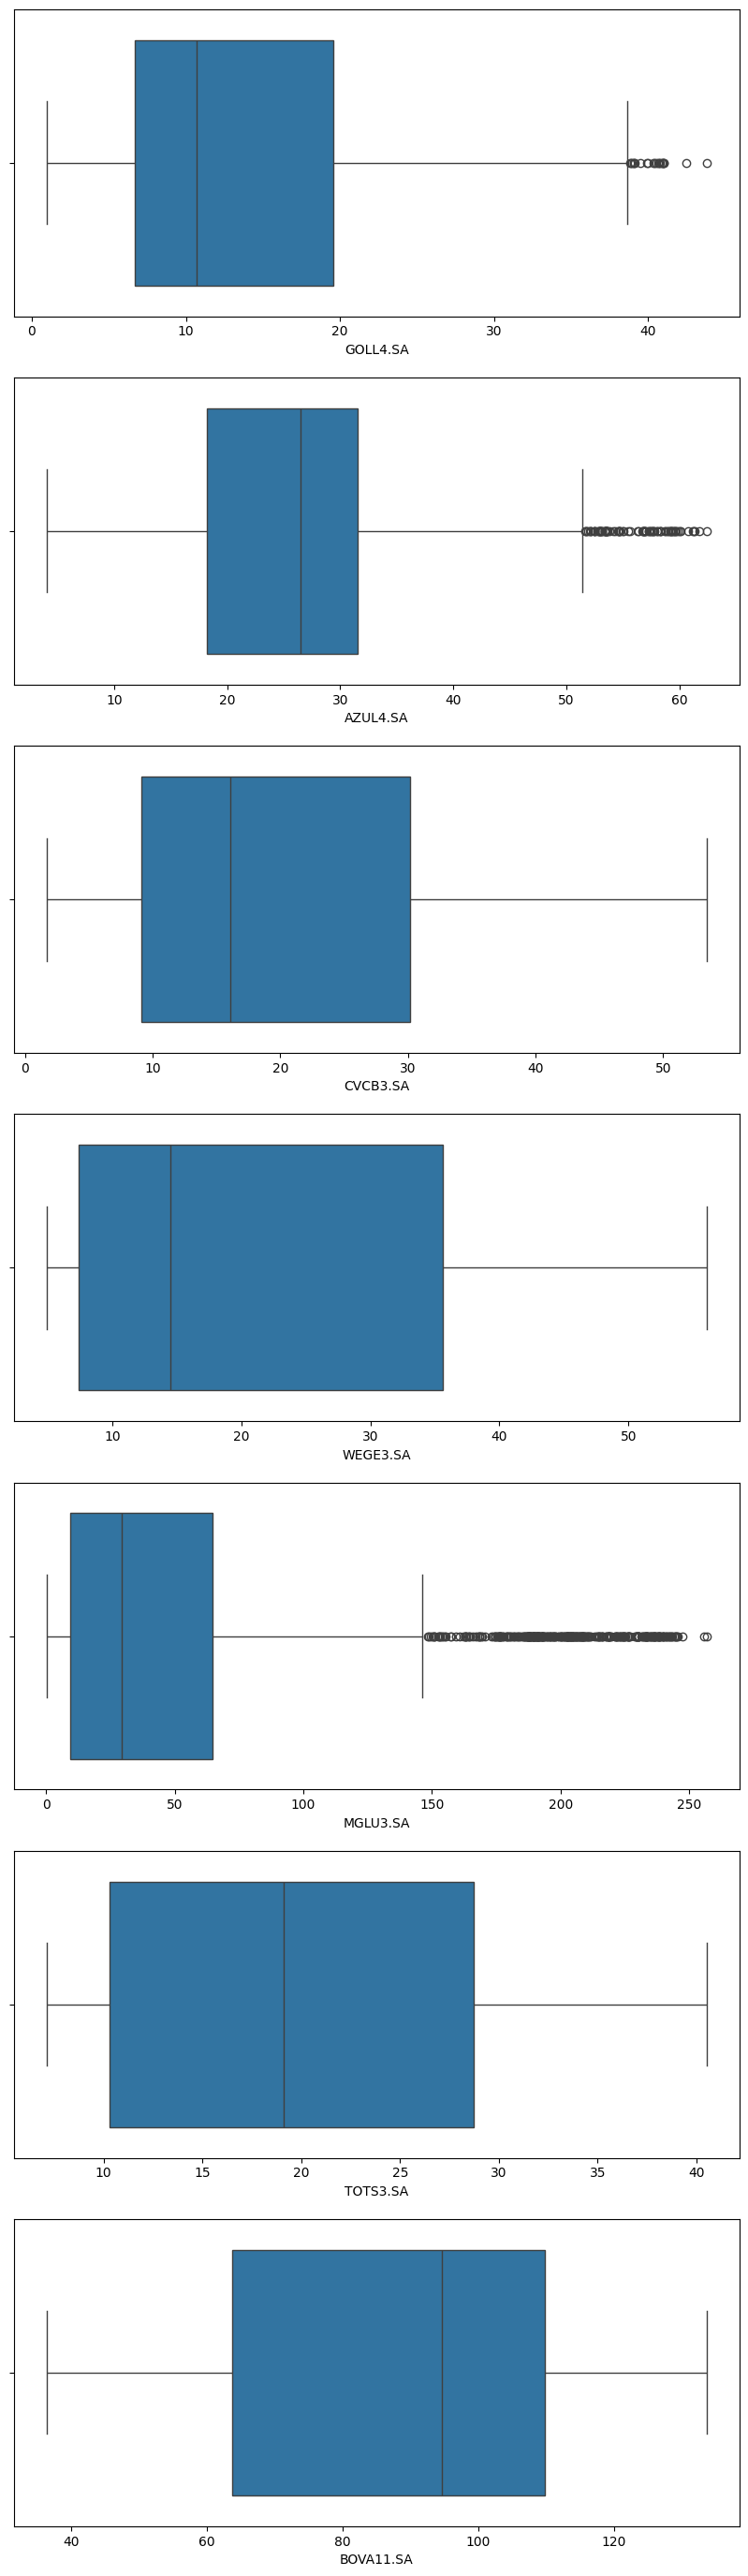

In [15]:
plt.figure(figsize=(10,40))
for i in np.arange(0,len(acoes_df.columns)):
    plt.subplot(8,1,i+1)
    sns.boxplot(x=acoes_df[acoes_df.columns[i]])
    
#CONSIGO ENTENDER A RELAÇÃO DE OUTLIERS E VER A ESTABILIDADE DOS DADOS

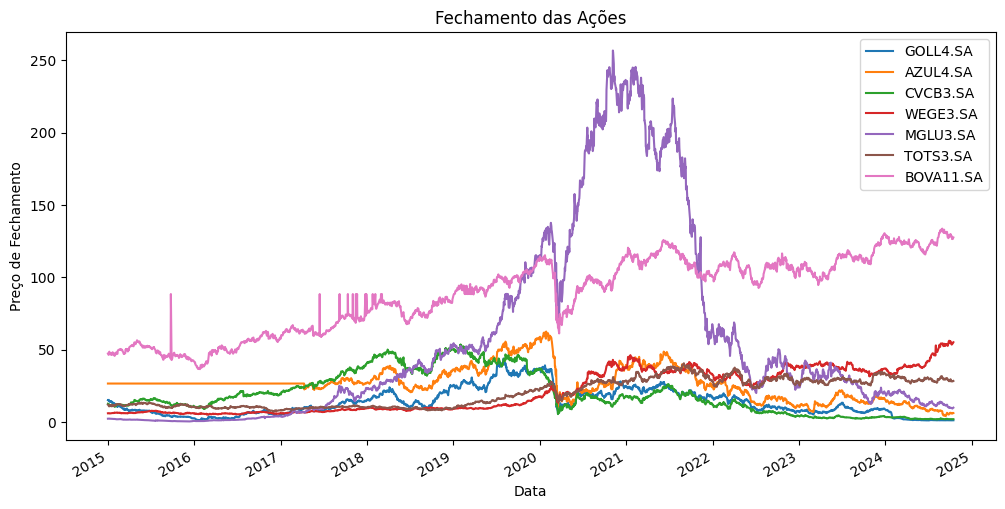

In [16]:

acoes_df.plot(figsize=(12, 6))
plt.title('Fechamento das Ações')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend(acoes)
plt.show()
